In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# The neural network model into base_model
base_model = load_model('D:\DeepLearningH5\\vgg16_1549482952.h5')

# Cut the customized layers from the read resnet algorithm
x=base_model.get_layer('block5_pool').output

# Eport network to one dimension
vector=Flatten()(x)

# Make the model with the whole network as input and the vector as output
model = Model(inputs=base_model.input, outputs=vector)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
test_datagen = ImageDataGenerator()     # Creating the Data generator

validation_data_dir = r'C:\DeepLearning\Test2'

# Create the validation image (The random image that will be given in the test)
validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                        target_size=(128, 128),
                                        batch_size=1,
                                        color_mode='rgb',
                                        class_mode = "categorical",
                                        shuffle=True)
x_img, y_label = next(validation_generator);
features = model.predict(x_img)

Found 1 images belonging to 1 classes.


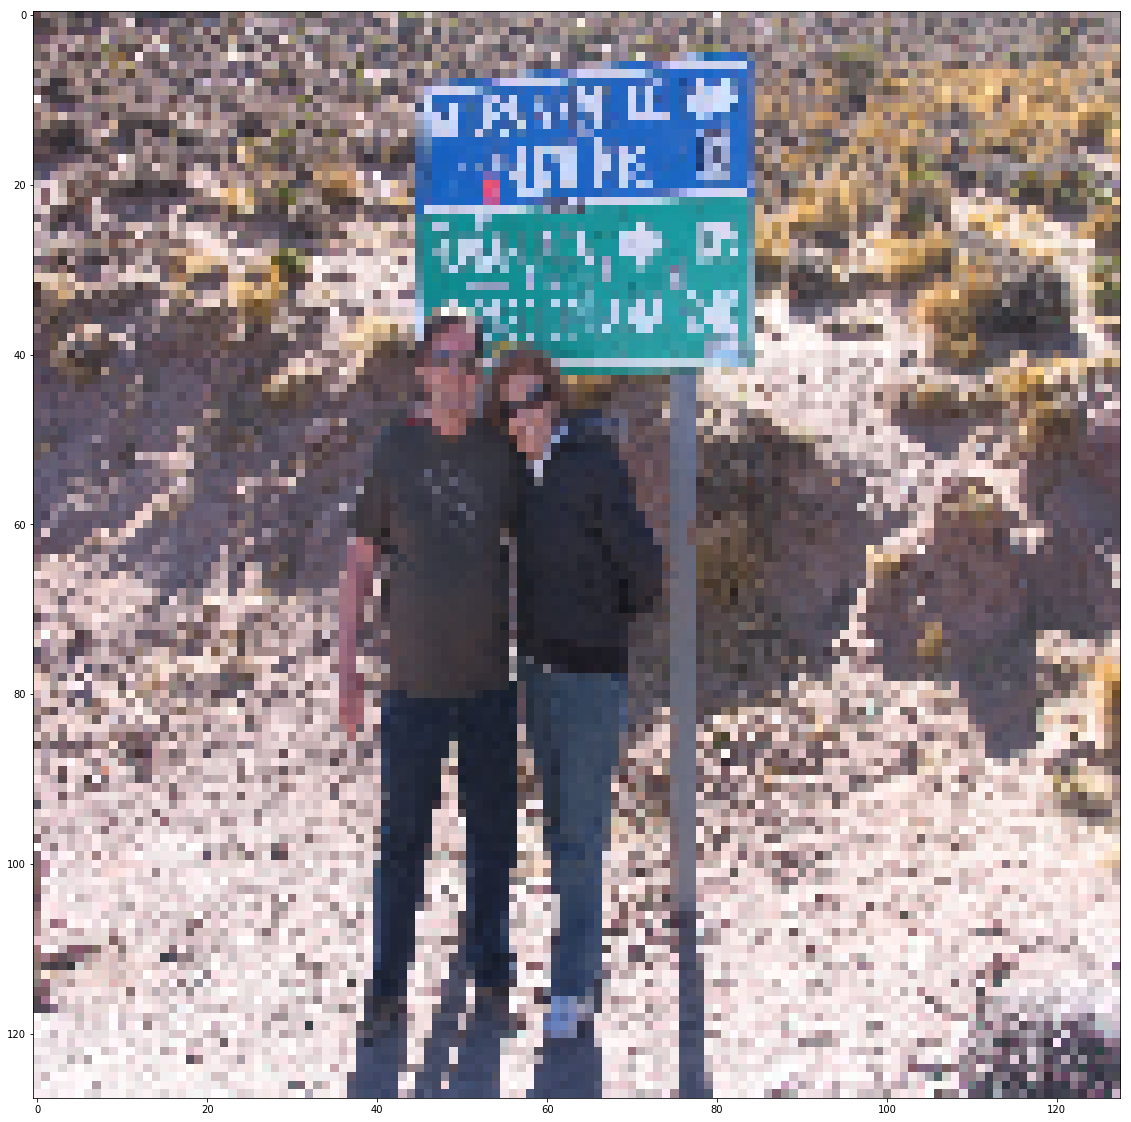

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#Show the selected image
plt.figure(figsize=(20, 20))
plt.subplot(1,1,1)
image = x_img
image= image.astype(int)
image = np.reshape(image, (128, 128, 3))
plt.imshow(image)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib

# Load the KNN trained data and predict with the images (Get the 10 nearest neighbors)
knn_file = r'C:\DeepLearning\KNN Data\\knn.sav'

neigh = joblib.load(knn_file)

In [22]:
labels = neigh.kneighbors(features, return_distance=False)

In [8]:
import numpy as np

# Load the index images to the file
test_images_file = r'C:\DeepLearning\KNN Data\\images3.npy'

imgsList = np.load(test_images_file)

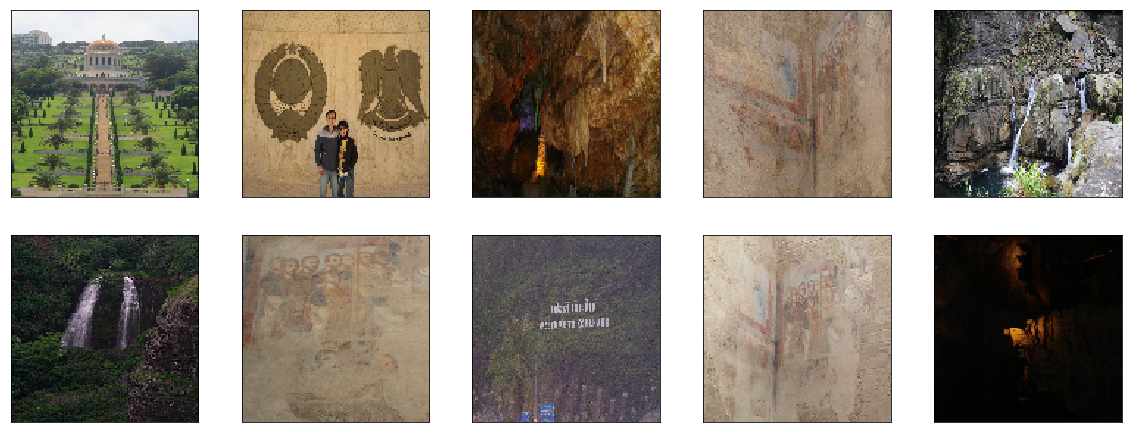

In [23]:
# Show the 10 nearest images
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = imgsList[labels[0][i]]
    image= image.astype(int)
    image = np.reshape(image, (128, 128, 3))
    plt.imshow(image)